<a href="https://colab.research.google.com/github/Machaves07/python/blob/main/PaliGemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cargar librerias

In [1]:
!pip install -q -U accelerate bitsandbytes git+https://github.com/huggingface/transformers.git gradio #

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00


### HuggingFace Login

In [8]:
from huggingface_hub import notebook_login

notebook_login()

## Cargando modelo

In [10]:
from transformers import AutoTokenizer, PaliGemmaForConditionalGeneration, PaliGemmaProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "google/paligemma-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16)
processor = PaliGemmaProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [80]:
import torch
import numpy as np
from PIL import Image
import requests

input_image = Image.open('/content/imagen_prueba_seguridad_hugging.jpg')

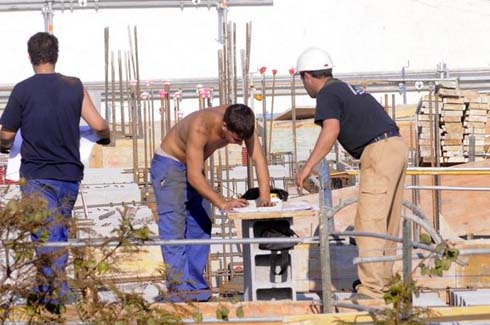

In [27]:
input_image

## Describir imagenes

In [81]:
input_text = "caption"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


caption
Three men are working on a construction site. One man is shirtless and has a white helmet on. He is holding a black object and has a black glove on his hand. The man in the white helmet is wearing a white shirt and has a white helmet on. The man in the blue pants is wearing blue pants and has a blue shirt on. The man in the tan pants is wearing tan pants and has a tan pants on. The man in the blue shirt is wearing a blue shirt and has a blue shirt on. The man in the white shirt is wearing a white shirt and has a white shirt on. The man in the blue pants is wearing a blue pants and has a blue pants on. The man in the white shirt is wearing a white shirt and has a white shirt on. The man in the blue pants is wearing a blue pants and has a blue pants on. The man in the white shirt is wearing a white shirt and has a white shirt on. The man in the blue pants is wearing a blue pants and has a blue pants on. The man in the white shirt is wearing a white shirt and has a white shirt on.

In [82]:
input_text = "caption es"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


caption es
Un grupo de hombres trabajando en un sitio de construcción.


## Q&A en imagenes


In [83]:
input_text = "responde en español, cuantas personas ves en la imagen? "
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


responde en español, cuantas personas ves en la imagen? 
Tres.


In [34]:
input_text = "responde en español, cuantas personas llevan guantes en la imagen?"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


responde en español, cuantas personas llevan guantes en la imagen?
Dos.


In [33]:
input_text = "que elementos de protección llevan las personas en la imagen?"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


que elementos de protección llevan las personas en la imagen?
Cascos y guantes.


## Deteccion de objetos

In [91]:
input_text = "detect person"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


detect person
<loc0324><loc0313><loc0953><loc0566> person ; <loc0146><loc0597><loc1022><loc0859> person ; <loc0101><loc0000><loc1022><loc0231> person


### Limpiando las coordenadas

In [92]:
output = result[len(input_text):].lstrip("\n")
output_list = output.split(';')

In [93]:
output_list

['<loc0324><loc0313><loc0953><loc0566> person ',
 ' <loc0146><loc0597><loc1022><loc0859> person ',
 ' <loc0101><loc0000><loc1022><loc0231> person']

### Generar coordenadas

In [94]:
import re

image_width, image_height = input_image.size

_SEGMENT_DETECT_RE = re.compile(
    r'(.*?)' +
    r'<loc(\d{4})>' * 4 + r'\s*' +
    '(?:%s)?' % (r'<seg(\d{3})>' * 16) +
    r'\s*([^;<>]+)? ?(?:; )?',
)

labels, boxes = [], []

for _ in output_list:
    m = _SEGMENT_DETECT_RE.match(_)
    gs = list(m.groups())
    before = gs.pop(0)
    name = gs.pop()
    y1, x1, y2, x2 = [int(x) / 1024 for x in gs[:4]]
    y1 = y1  * image_height
    x1 = x1  * image_width
    y2 = y2  * image_height
    x2 = x2  * image_width
    boxes.append((x1, y1, x2, y2))
    labels.append(name)


In [95]:
boxes

[(149.775390625, 102.83203125, 270.83984375, 302.4658203125),
 (285.673828125, 46.337890625, 411.044921875, 324.365234375),
 (0.0, 32.0556640625, 110.537109375, 324.365234375)]

In [96]:
labels

['person ', 'person ', 'person']

### Generando imagen

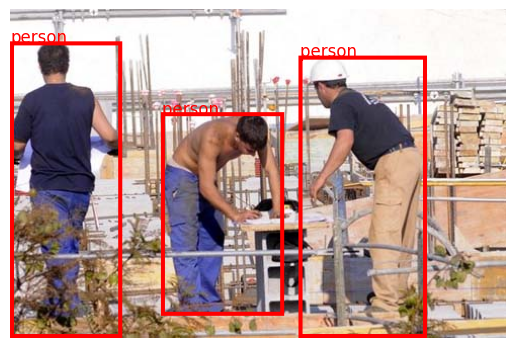

In [97]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
image_copy = input_image.copy()

draw = ImageDraw.Draw(image_copy)
for i in range(len(boxes)):
  draw.rectangle(boxes[i], outline="red", width=4)
  plt.text(boxes[i][0], boxes[i][1], labels[i], color='red', fontsize=12)
# Mostrar la imagen con el rectángulo
plt.imshow(image_copy)
plt.axis('off')
plt.show()

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

### Un ejemplo mas

In [56]:
input_image = Image.open('/content/imagen_prueba_hugging.jpg')

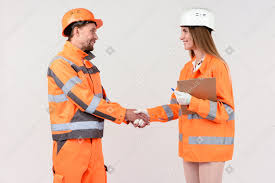

In [57]:
input_image

In [58]:
input_text = "detect bottle ; man; woman"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


detect bottle ; man; woman
<loc0037><loc0169><loc1023><loc0624> man ; <loc0037><loc0493><loc1023><loc0876> woman


In [59]:
output = result[len(input_text):].lstrip("\n")
output_list = output.split(';')
output_list

['<loc0037><loc0169><loc1023><loc0624> man ',
 ' <loc0037><loc0493><loc1023><loc0876> woman']

In [60]:
def get_coordinates(output_list, image_height,image_width ):
  labels, boxes = [], []

  for _ in output_list:
      m = _SEGMENT_DETECT_RE.match(_)
      gs = list(m.groups())
      before = gs.pop(0)
      name = gs.pop()
      y1, x1, y2, x2 = [int(x) / 1024 for x in gs[:4]]
      y1 = y1  * image_height
      x1 = x1  * image_width
      y2 = y2  * image_height
      x2 = x2  * image_width
      boxes.append((x1, y1, x2, y2))
      labels.append(name)
  return boxes, labels

In [61]:
image_width, image_height = input_image.size
boxes, labels = get_coordinates(output_list, image_height,image_width)

In [66]:
def draw_detection(image, boxes, labels):
  draw = ImageDraw.Draw(image_copy)
  for i in range(len(boxes)):
    draw.rectangle(boxes[i], outline="red", width=4)
    plt.text(boxes[i][0], boxes[i][1], labels[i], color='red', fontsize=12)
  # Mostrar la imagen con el rectángulo
  plt.imshow(image_copy)
  plt.axis('off')
  plt.show

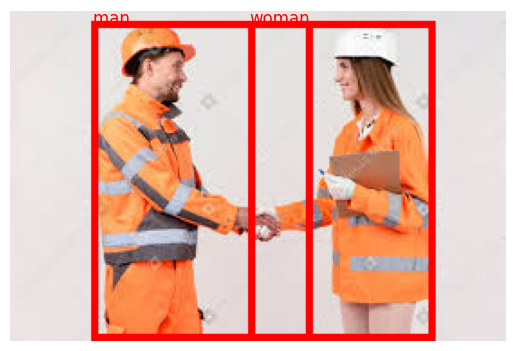

In [67]:
image_copy = input_image.copy()
draw_detection(image_copy,boxes,labels)

## Segmentacion de objetos

In [68]:
input_text = "segment bottle ; woman"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


segment bottle ; woman
<loc0037><loc0506><loc1023><loc0876> <seg009><seg074><seg057><seg010><seg008><seg074><seg116><seg026><seg118><seg097><seg125><seg029><seg074><seg078><seg072><seg086> woman


In [69]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="google/paligemma-hf", filename="vae-oid.npz",
                repo_type="space", local_dir="./")

vae-oid.npz:   0%|          | 0.00/8.48M [00:00<?, ?B/s]

'vae-oid.npz'

In [70]:
import re
import flax.linen as nn
import jax
import jax.numpy as jnp
import numpy as np
import functools
import PIL

_MODEL_PATH = 'vae-oid.npz'

_SEGMENT_DETECT_RE = re.compile(
    r'(.*?)' +
    r'<loc(\d{4})>' * 4 + r'\s*' +
    '(?:%s)?' % (r'<seg(\d{3})>' * 16) +
    r'\s*([^;<>]+)? ?(?:; )?',
)


def _get_params(checkpoint):

  def transp(kernel):
    return np.transpose(kernel, (2, 3, 1, 0))

  def conv(name):
    return {
        'bias': checkpoint[name + '.bias'],
        'kernel': transp(checkpoint[name + '.weight']),
    }

  def resblock(name):
    return {
        'Conv_0': conv(name + '.0'),
        'Conv_1': conv(name + '.2'),
        'Conv_2': conv(name + '.4'),
    }

  return {
      '_embeddings': checkpoint['_vq_vae._embedding'],
      'Conv_0': conv('decoder.0'),
      'ResBlock_0': resblock('decoder.2.net'),
      'ResBlock_1': resblock('decoder.3.net'),
      'ConvTranspose_0': conv('decoder.4'),
      'ConvTranspose_1': conv('decoder.6'),
      'ConvTranspose_2': conv('decoder.8'),
      'ConvTranspose_3': conv('decoder.10'),
      'Conv_1': conv('decoder.12'),
  }


def _quantized_values_from_codebook_indices(codebook_indices, embeddings):
  batch_size, num_tokens = codebook_indices.shape
  assert num_tokens == 16, codebook_indices.shape
  unused_num_embeddings, embedding_dim = embeddings.shape

  encodings = jnp.take(embeddings, codebook_indices.reshape((-1)), axis=0)
  encodings = encodings.reshape((batch_size, 4, 4, embedding_dim))
  return encodings


@functools.cache
def _get_reconstruct_masks():
  """Reconstructs masks from codebook indices.
  Returns:
    A function that expects indices shaped `[B, 16]` of dtype int32, each
    ranging from 0 to 127 (inclusive), and that returns a decoded masks sized
    `[B, 64, 64, 1]`, of dtype float32, in range [-1, 1].
  """

  class ResBlock(nn.Module):
    features: int

    @nn.compact
    def __call__(self, x):
      original_x = x
      x = nn.Conv(features=self.features, kernel_size=(3, 3), padding=1)(x)
      x = nn.relu(x)
      x = nn.Conv(features=self.features, kernel_size=(3, 3), padding=1)(x)
      x = nn.relu(x)
      x = nn.Conv(features=self.features, kernel_size=(1, 1), padding=0)(x)
      return x + original_x

  class Decoder(nn.Module):
    """Upscales quantized vectors to mask."""

    @nn.compact
    def __call__(self, x):
      num_res_blocks = 2
      dim = 128
      num_upsample_layers = 4

      x = nn.Conv(features=dim, kernel_size=(1, 1), padding=0)(x)
      x = nn.relu(x)

      for _ in range(num_res_blocks):
        x = ResBlock(features=dim)(x)

      for _ in range(num_upsample_layers):
        x = nn.ConvTranspose(
            features=dim,
            kernel_size=(4, 4),
            strides=(2, 2),
            padding=2,
            transpose_kernel=True,
        )(x)
        x = nn.relu(x)
        dim //= 2

      x = nn.Conv(features=1, kernel_size=(1, 1), padding=0)(x)

      return x

  def reconstruct_masks(codebook_indices):
    quantized = _quantized_values_from_codebook_indices(
        codebook_indices, params['_embeddings']
    )
    return Decoder().apply({'params': params}, quantized)

  with open(_MODEL_PATH, 'rb') as f:
    params = _get_params(dict(np.load(f)))

  return jax.jit(reconstruct_masks, backend='cpu')

def extract_objs(text, width, height, unique_labels=False):
  """Returns objs for a string with "<loc>" and "<seg>" tokens."""
  objs = []
  seen = set()
  while text:
    m = _SEGMENT_DETECT_RE.match(text)
    if not m:
      break
    gs = list(m.groups())
    before = gs.pop(0)
    name = gs.pop()
    y1, x1, y2, x2 = [int(x) / 1024 for x in gs[:4]]

    y1, x1, y2, x2 = map(round, (y1*height, x1*width, y2*height, x2*width))
    seg_indices = gs[4:20]
    if seg_indices[0] is None:
      mask = None
    else:
      seg_indices = np.array([int(x) for x in seg_indices], dtype=np.int32)
      m64, = _get_reconstruct_masks()(seg_indices[None])[..., 0]
      m64 = np.clip(np.array(m64) * 0.5 + 0.5, 0, 1)
      m64 = PIL.Image.fromarray((m64 * 255).astype('uint8'))
      mask = np.zeros([height, width])
      if y2 > y1 and x2 > x1:
        mask[y1:y2, x1:x2] = np.array(m64.resize([x2 - x1, y2 - y1])) / 255.0

    content = m.group()
    if before:
      objs.append(dict(content=before))
      content = content[len(before):]
    while unique_labels and name in seen:
      name = (name or '') + "'"
    seen.add(name)
    objs.append(dict(
        content=content, xyxy=(x1, y1, x2, y2), mask=mask, name=name))
    text = text[len(before) + len(content):]

  if text:
    objs.append(dict(content=text))

  return objs

In [71]:
result = result[len(input_text):].lstrip("\n")

In [72]:
width = input_image.size[0]
height = input_image.size[1]
masks = extract_objs(result, width, height)

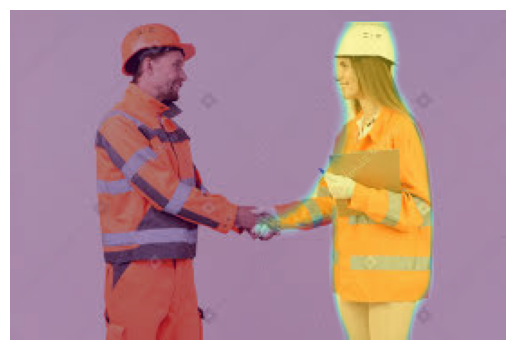

In [73]:
import matplotlib.pyplot as plt

plt.imshow(input_image, cmap='gray')

for _ in masks:
    plt.imshow(_['mask'], cmap='viridis', alpha=0.4, vmin=0, vmax=1)

plt.axis('off')
plt.show()